In [60]:
#Collection of real-world data
#Use of a database (e.g. SQLite, PostgreSQL) and SQL-queries (must be part of the Python programming code)
import sqlite3
import csv

conn = sqlite3.connect('piomas_data.db')
c = conn.cursor()
c.execute('''CREATE TABLE IF NOT EXISTS piomas_data (
                year INTEGER,
                Jan REAL,
                Feb REAL,
                Mar REAL,
                Apr REAL,
                May REAL,
                Jun REAL,
                Jul REAL,
                Aug REAL,
                Sep REAL,
                Oct REAL,
                Nov REAL,
                Dec REAL
            )''')
with open('PIOMAS.monthly.Current.v2.1.csv', 'r') as file:
    csv_data = csv.reader(file)
    next(csv_data)  # Skip header row
    for row in csv_data:
        c.execute('INSERT INTO piomas_data VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)', row)
conn.commit()
conn.close()


Pearson correlation coefficient: -0.946912475765336
T-test: t_stat=37.00474116195276, p_value=1.0988093593532122e-131


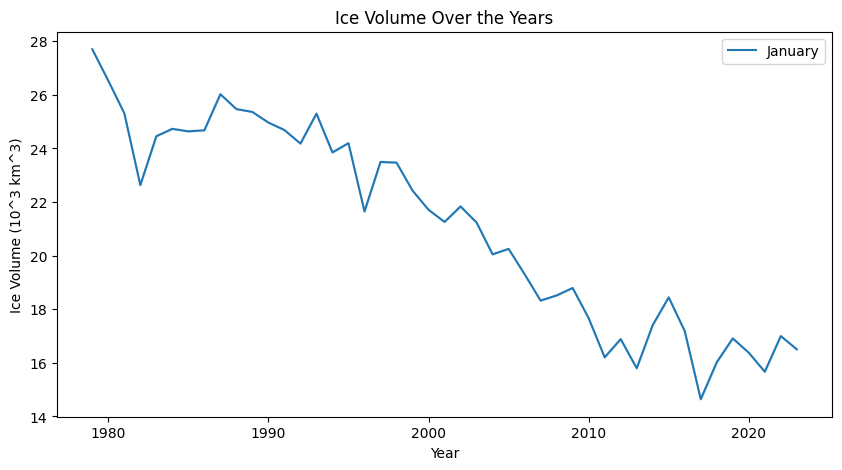

In [61]:
#Use of Python built-in data structures (lists, dictionaries, sets, tuples) and pandas data frames:
#Use of a database (e.g. SQLite, PostgreSQL) and SQL-queries (must be part of the Python programming code)
import sqlite3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind

# Connect to the SQLite database
conn = sqlite3.connect('piomas_data.db')

# Read data from the database using SQL query
query = "SELECT year, Jan FROM piomas_data"
df_ice_volume = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Perform correlation analysis
corr, _ = pearsonr(df_ice_volume['year'], df_ice_volume['Jan'])
print(f"Pearson correlation coefficient: {corr}")

# Perform t-test
group1 = df_ice_volume[df_ice_volume['year'] < 2000]['Jan']
group2 = df_ice_volume[df_ice_volume['year'] >= 2000]['Jan']
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-test: t_stat={t_stat}, p_value={p_value}")

# Set the figure size
plt.figure(figsize=(10,5))

# Create the plot
sns.lineplot(x='year', y='Jan', data=df_ice_volume, label='January')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Ice Volume (10^3 km^3)')
plt.title('Ice Volume Over the Years')

# Show the plot
plt.show()


In [62]:
#import data about co2 from datapackage
import datapackage
import pandas as pd

data_url = 'https://datahub.io/core/co2-ppm/datapackage.json'

# to load Data Package into storage
package = datapackage.Package(data_url)

# to load only tabular data
resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
        print (data)

           Date  Decimal Date  Average  Interpolated   Trend  Number of Days
0    1958-03-01      1958.208   315.71        315.71  314.62              -1
1    1958-04-01      1958.292   317.45        317.45  315.29              -1
2    1958-05-01      1958.375   317.50        317.50  314.71              -1
3    1958-06-01      1958.458   -99.99        317.10  314.85              -1
4    1958-07-01      1958.542   315.86        315.86  314.98              -1
..          ...           ...      ...           ...     ...             ...
722  2018-05-01      2018.375   411.24        411.24  407.91              24
723  2018-06-01      2018.458   410.79        410.79  408.49              29
724  2018-07-01      2018.542   408.71        408.71  408.32              27
725  2018-08-01      2018.625   406.99        406.99  408.90              30
726  2018-09-01      2018.708   405.51        405.51  409.02              29

[727 rows x 6 columns]
          Year    Mean  Uncertainty
0   1959-11-01  

T-test: t_stat=-10.439215703304562, p_value=1.403237355325012e-12
Pearson correlation coefficient: 0.995910260496282


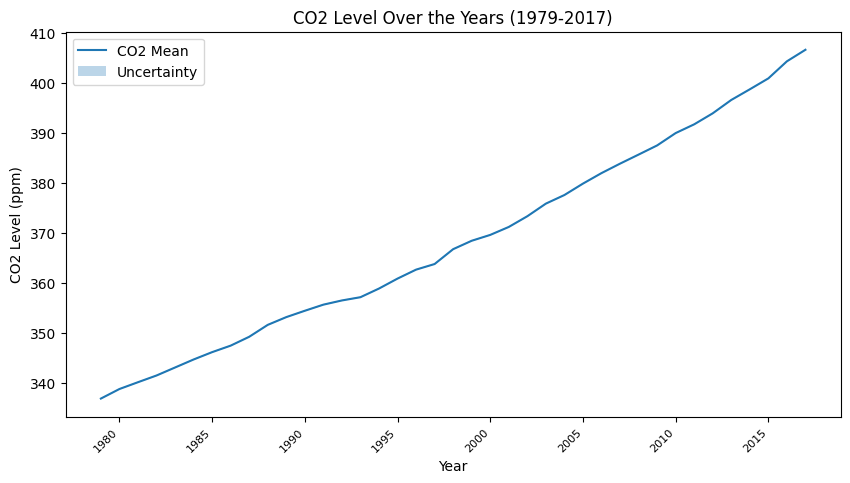

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind
import warnings
warnings.filterwarnings('ignore')

# Define the file path
file_path = r"F:\ZHAW\Scientific Programming\Project_sp2\co2_data_annual.txt"

# Read the txt file into a pandas DataFrame
df_co2 = pd.read_csv(file_path, delimiter="\s+")

# Filter the DataFrame to include data from 1979 to 2017
df_filtered_co2 = df_co2[(df_co2['Year'] >= '1979-11-01') & (df_co2['Year'] <= '2017-11-01')]

# Extract only the year part from the "Year" column
df_filtered_co2['Year'] = pd.to_datetime(df_filtered_co2['Year']).dt.year

# Perform t-test
co2_before_2000 = df_filtered_co2[df_filtered_co2['Year'] < 2000]['Mean']
co2_after_2000 = df_filtered_co2[df_filtered_co2['Year'] >= 2000]['Mean']
t_stat, p_value = ttest_ind(co2_before_2000, co2_after_2000)
print(f"T-test: t_stat={t_stat}, p_value={p_value}")

# Perform correlation analysis
correlation, _ = pearsonr(df_filtered_co2['Year'], df_filtered_co2['Mean'])
print(f"Pearson correlation coefficient: {correlation}")

# Set the figure size
plt.figure(figsize=(10, 5))

# Create the line plot with uncertainty
sns.lineplot(data=df_filtered_co2, x='Year', y='Mean', label='CO2 Mean')
plt.fill_between(df_filtered_co2['Year'], df_filtered_co2['Mean'] - df_filtered_co2['Uncertainty'],
                 df_filtered_co2['Mean'] + df_filtered_co2['Uncertainty'], alpha=0.3, label='Uncertainty')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('CO2 Level (ppm)')
plt.title('CO2 Level Over the Years (1979-2017)')

# Customize the x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)

# Add a legend
plt.legend()

# Show the plot
plt.show()


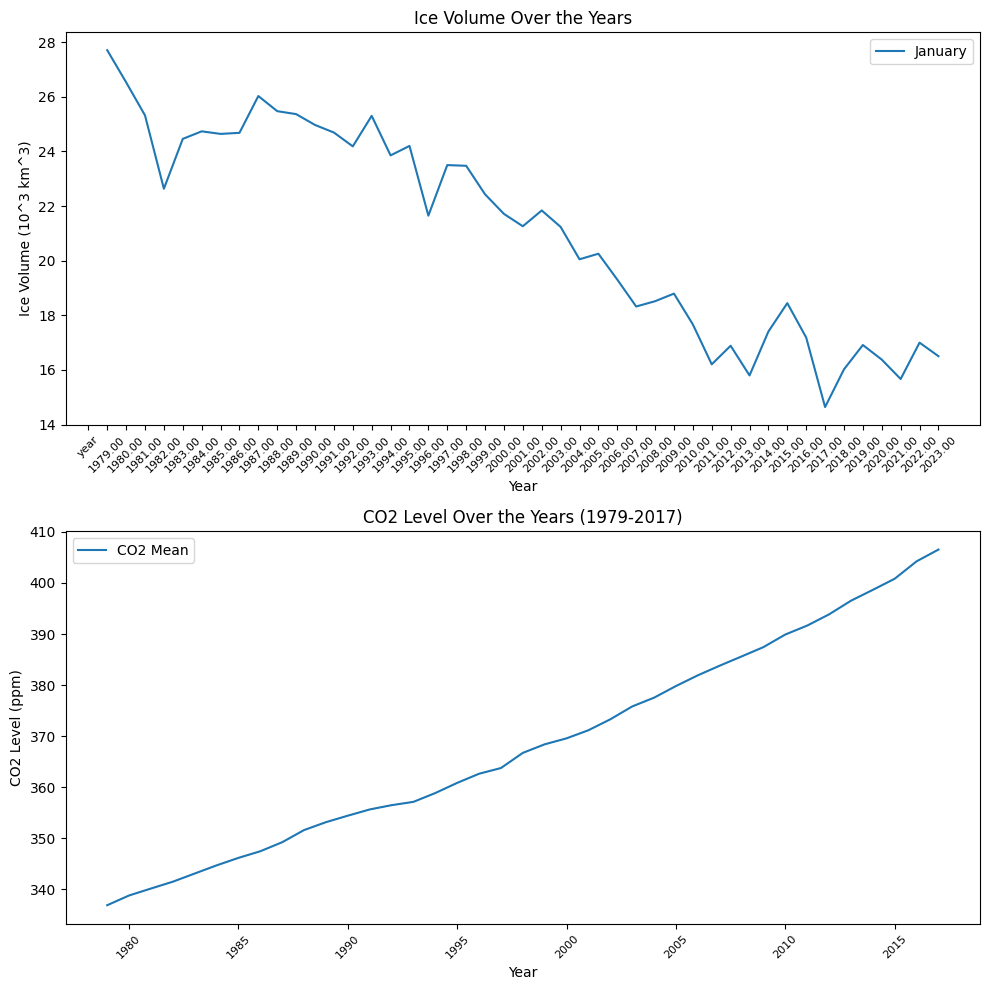

In [64]:

#Use of tables, visualizations/graphics for data exploration:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings('ignore')

# Ice Volume Data
file_path_ice_volume = r"F:\ZHAW\Scientific Programming\Project_sp2\PIOMAS.monthly.Current.v2.1.csv"
column_names = ['year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_ice_volume = pd.read_csv(file_path_ice_volume, names=column_names)
df_ice_volume.loc[:, 'Jan':'Dec'] = df_ice_volume.loc[:, 'Jan':'Dec'].apply(pd.to_numeric, errors='coerce')
df_ice_volume['Annual_avg'] = df_ice_volume.loc[:, 'Jan':'Dec'].mean(axis=1)

# CO2 Data
file_path_co2 = r"F:\ZHAW\Scientific Programming\Project_sp2\co2_data_annual.txt"
df_co2 = pd.read_csv(file_path_co2, delimiter="\s+")
df_filtered_co2 = df_co2[(df_co2['Year'] >= '1979-11-01') & (df_co2['Year'] <= '2017-11-01')]
df_filtered_co2['Year'] = pd.to_datetime(df_filtered_co2['Year']).dt.year

# Set the figure size and create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot 1 - Ice Volume Over the Years
sns.lineplot(x='year', y='Jan', data=df_ice_volume, label='January', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('Ice Volume (10^3 km^3)')
ax1.set_title('Ice Volume Over the Years')
ax1.tick_params(axis='x', rotation=45, labelsize=8)

# Plot 2 - CO2 Level Over the Years (1979-2017)
sns.lineplot(data=df_filtered_co2, x='Year', y='Mean', label='CO2 Mean', ax=ax2)
plt.fill_between(df_filtered_co2['Year'], df_filtered_co2['Mean'] - df_filtered_co2['Uncertainty'],
                 df_filtered_co2['Mean'] + df_filtered_co2['Uncertainty'], alpha=0.3, label='Uncertainty')
ax2.set_xlabel('Year')
ax2.set_ylabel('CO2 Level (ppm)')
ax2.set_title('CO2 Level Over the Years (1979-2017)')
ax2.tick_params(axis='x', rotation=45, labelsize=8)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


Pearson correlation coefficient (Temperature Index vs. Year): 0.9327785937924311
T-test (Temperature Index before 2000 vs. after 2000): t_stat=-9.172116124391275, p_value=1.3870077272819046e-11


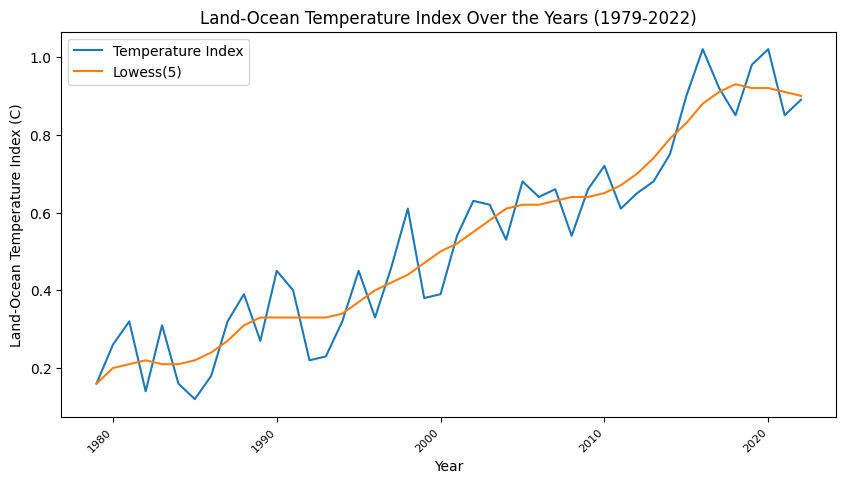

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, ttest_ind

# Define the file path
file_path = r"F:\ZHAW\Scientific Programming\Project_sp2\Land-Ocean_Temparature_Index.txt"

# Read the txt file into a pandas DataFrame
df_temp_index = pd.read_csv(file_path, delimiter="\s+")

# Filter the DataFrame to include data from 1979 to 2022
df_filtered_temp_index = df_temp_index[(df_temp_index['Year'] >= 1979) & (df_temp_index['Year'] <= 2022)]

# Perform correlation analysis
corr, _ = pearsonr(df_filtered_temp_index['Year'], df_filtered_temp_index['No_Smoothing'])
print(f"Pearson correlation coefficient (Temperature Index vs. Year): {corr}")

# Perform t-test for two groups: before and after 2000
group1 = df_filtered_temp_index[df_filtered_temp_index['Year'] < 2000]['No_Smoothing']
group2 = df_filtered_temp_index[df_filtered_temp_index['Year'] >= 2000]['No_Smoothing']
t_stat, p_value = ttest_ind(group1, group2)
print(f"T-test (Temperature Index before 2000 vs. after 2000): t_stat={t_stat}, p_value={p_value}")

# Set the figure size
plt.figure(figsize=(10, 5))

# Create the line plot for 'No_Smoothing'
plt.plot(df_filtered_temp_index['Year'], df_filtered_temp_index['No_Smoothing'], label='Temperature Index')

# Create the line plot for 'Lowess(5)'
plt.plot(df_filtered_temp_index['Year'], df_filtered_temp_index['Lowess(5)'], label='Lowess(5)')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Land-Ocean Temperature Index (C)')
plt.title('Land-Ocean Temperature Index Over the Years (1979-2022)')

# Customize the x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=8)

# Add a legend
plt.legend()

# Show the plot
plt.show()


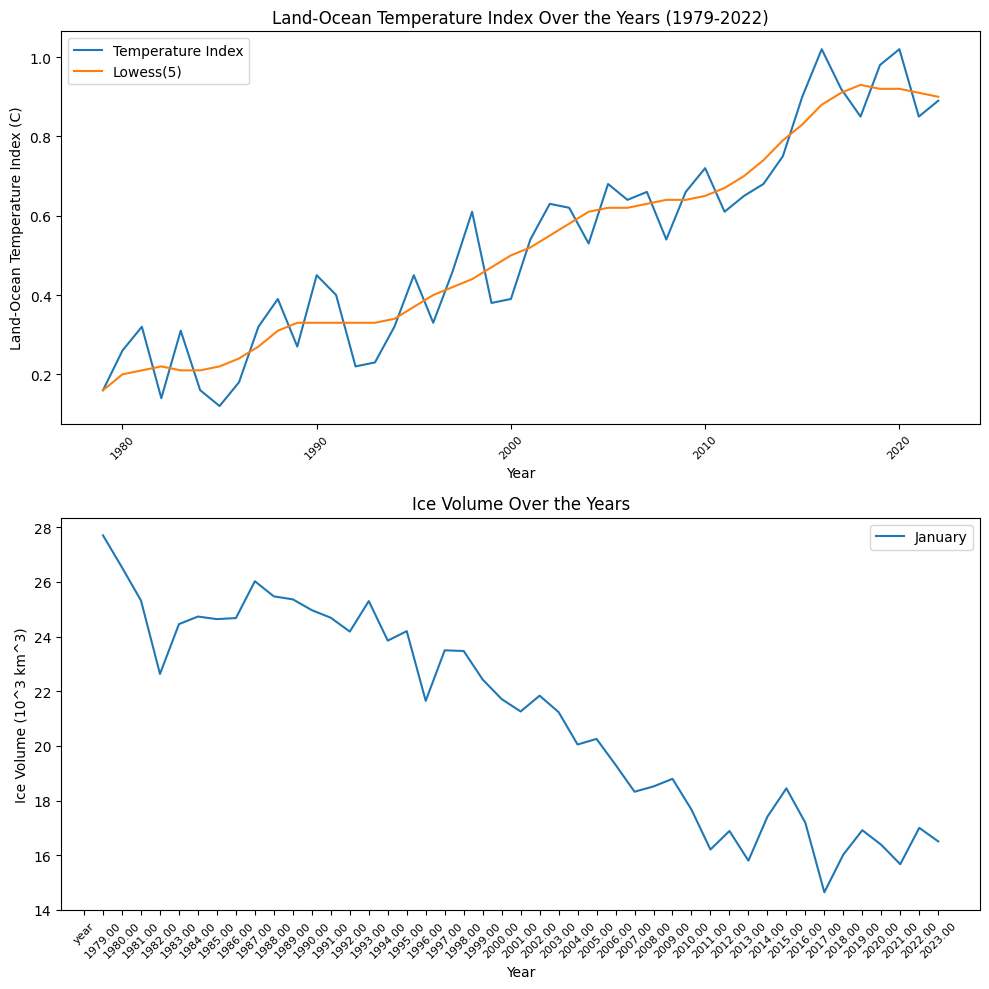

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and process the ice volume data
file_path = "F:\\ZHAW\\Scientific Programming\\Project_sp2\\PIOMAS.monthly.Current.v2.1.csv"
column_names = ['year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_ice_volume = pd.read_csv(file_path, names=column_names)
df_ice_volume.loc[:, 'Jan':'Dec'] = df_ice_volume.loc[:, 'Jan':'Dec'].apply(pd.to_numeric, errors='coerce')
df_ice_volume['Annual_avg'] = df_ice_volume.loc[:, 'Jan':'Dec'].mean(axis=1)

# Load and process the land-ocean temperature index data
file_path = r"F:\ZHAW\Scientific Programming\Project_sp2\Land-Ocean_Temparature_Index.txt"
df_temp_index = pd.read_csv(file_path, delimiter="\s+")
df_filtered_temp_index = df_temp_index[(df_temp_index['Year'] >= 1979) & (df_temp_index['Year'] <= 2022)]

# Create subplots within a single figure
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10))

# Plot 1 - Land-Ocean Temperature Index
ax1.plot(df_filtered_temp_index['Year'], df_filtered_temp_index['No_Smoothing'], label='Temperature Index')
ax1.plot(df_filtered_temp_index['Year'], df_filtered_temp_index['Lowess(5)'], label='Lowess(5)')
ax1.set_xlabel('Year')
ax1.set_ylabel('Land-Ocean Temperature Index (C)')
ax1.set_title('Land-Ocean Temperature Index Over the Years (1979-2022)')
ax1.tick_params(axis='x', rotation=45, labelsize=8)
ax1.legend()

# Plot 2 - Ice Volume
sns.lineplot(x='year', y='Jan', data=df_ice_volume, label='January', ax=ax2)
ax2.set_xlabel('Year')
ax2.set_ylabel('Ice Volume (10^3 km^3)')
ax2.set_title('Ice Volume Over the Years')
ax2.tick_params(axis='x', rotation=45, labelsize=8)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the combined plot
plt.show()
